In [1]:
# Data Handling and Preprocessing
import pandas as pd            # DataFrame structure and data handling
import numpy as np             # Numerical operations

# Data Preprocessing
from sklearn.model_selection import train_test_split    # Train-test split
from sklearn.preprocessing import StandardScaler        # Feature scaling
from sklearn.preprocessing import OneHotEncoder         # Encoding categorical features
from imblearn.over_sampling import SMOTE                # Handling class imbalance

# Model Training
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.svm import SVC                             # Support Vector Machine
from xgboost import XGBClassifier                       # XGBoost model

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   # Evaluation metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc           # Additional metrics and ROC

# Model Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV   # Hyperparameter tuning

# Visualization
import matplotlib.pyplot as plt     # Data visualization
import seaborn as sns               # Enhanced visualization

# Interpretability
import shap                          # SHAP for feature importance

# System
import warnings                      # To handle warnings
warnings.filterwarnings('ignore')


In [2]:
# Define column names for the NSL-KDD dataset
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label', 'difficulty'
]


In [3]:
# Load the training data
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sarmad Project/Dataset/KDDTrain+.txt', names=column_names, sep=",", header=None)

# Load the testing data
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sarmad Project/Dataset/KDDTest+.txt', names=column_names, sep=",", header=None)


In [4]:
# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

# Display the first few rows of the testing data
print("Testing Data:")
print(test_data.head())


Training Data:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   

In [5]:
# Check the shape to ensure we have all columns
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (125973, 43)
Testing Data Shape: (22544, 43)


In [6]:
# Summary of the label distribution
print("Training Data Label Distribution:")
print(train_data['label'].value_counts())
print("Testing Data Label Distribution:")
print(test_data['label'].value_counts())

Training Data Label Distribution:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64
Testing Data Label Distribution:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgeta

##1. Basic Data Overview
Start by understanding the overall structure and summary statistics of the dataset.

In [7]:
# General information about the training dataset
print("Training Data Info:")
print(train_data.info())

# Summary statistics of numerical features
print("Training Data Description:")
print(train_data.describe())

# Check for missing values
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

# Display label distribution
print("Label Distribution in Training Data:")
print(train_data['label'].value_counts())


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 no

##2. Data Types and Feature Groups
The dataset contains a mix of categorical and numerical features. We can categorize them for focused analysis.

In [8]:
# Separate categorical and numerical features
categorical_features = ['protocol_type', 'service', 'flag']
numerical_features = [col for col in train_data.columns if col not in categorical_features + ['label', 'difficulty']]

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['protocol_type', 'service', 'flag']
Numerical Features: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


##3. Visualizing Categorical Features
Analyze the distribution of categorical features like protocol_type, service, and flag.

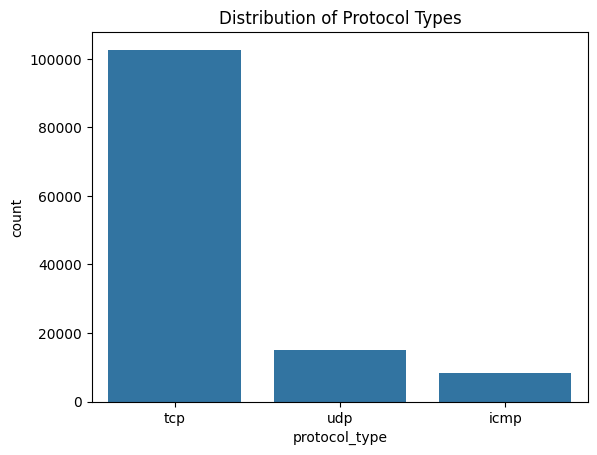

In [11]:
# Distribution of 'protocol_type'
sns.countplot(data=train_data, x='protocol_type', order=train_data['protocol_type'].value_counts().index)
plt.title('Distribution of Protocol Types')
plt.show()



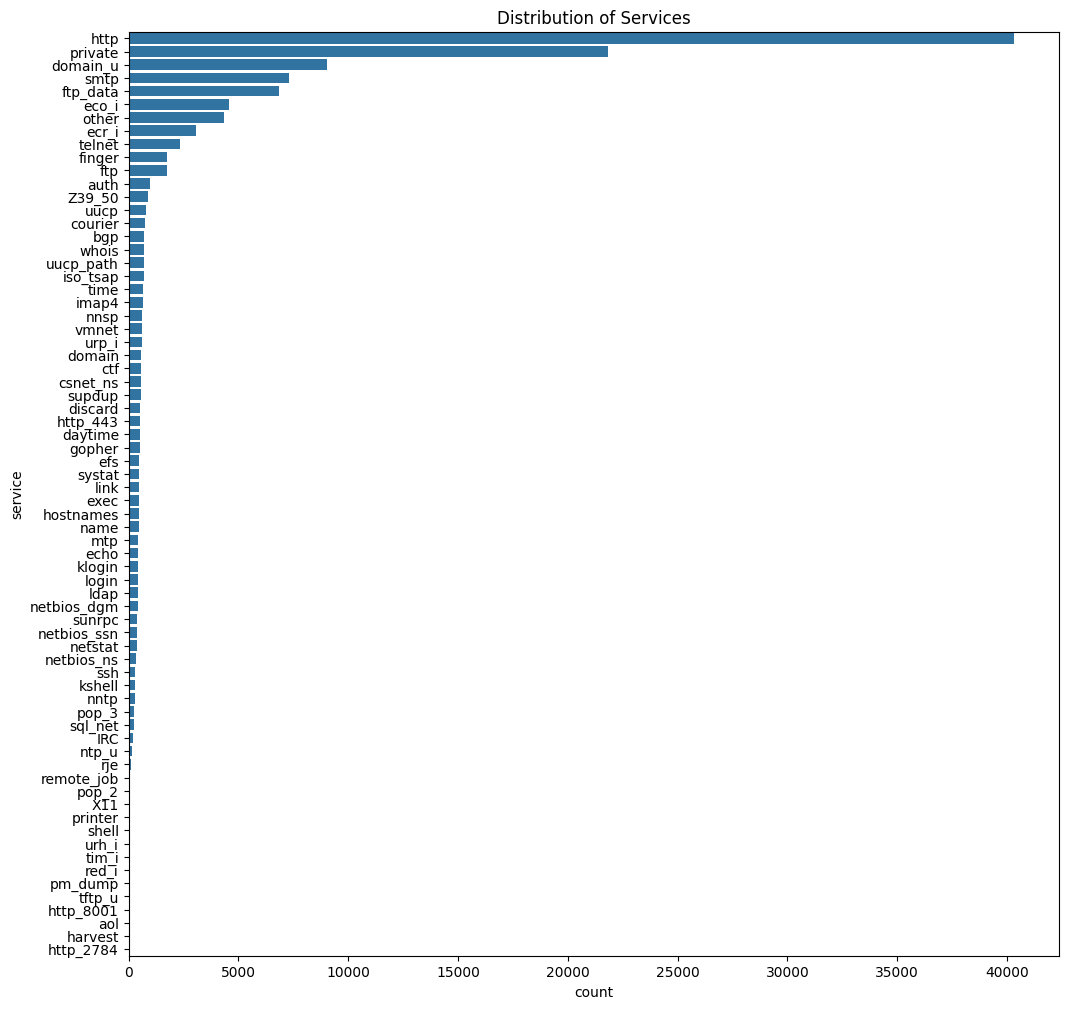

In [15]:
# Distribution of 'service'
plt.figure(figsize=(12, 12))
sns.countplot(data=train_data, y='service', order=train_data['service'].value_counts().index)
plt.title('Distribution of Services')
plt.show()


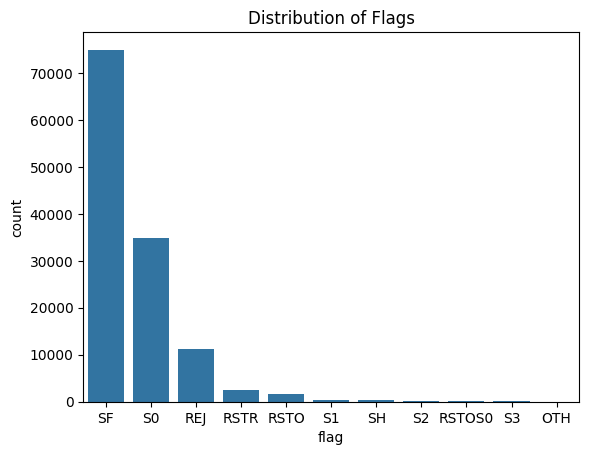

In [13]:
# Distribution of 'flag'
sns.countplot(data=train_data, x='flag', order=train_data['flag'].value_counts().index)
plt.title('Distribution of Flags')
plt.show()

##4. Visualizing Label Distribution
Analyze the distribution of attack types and normal traffic.

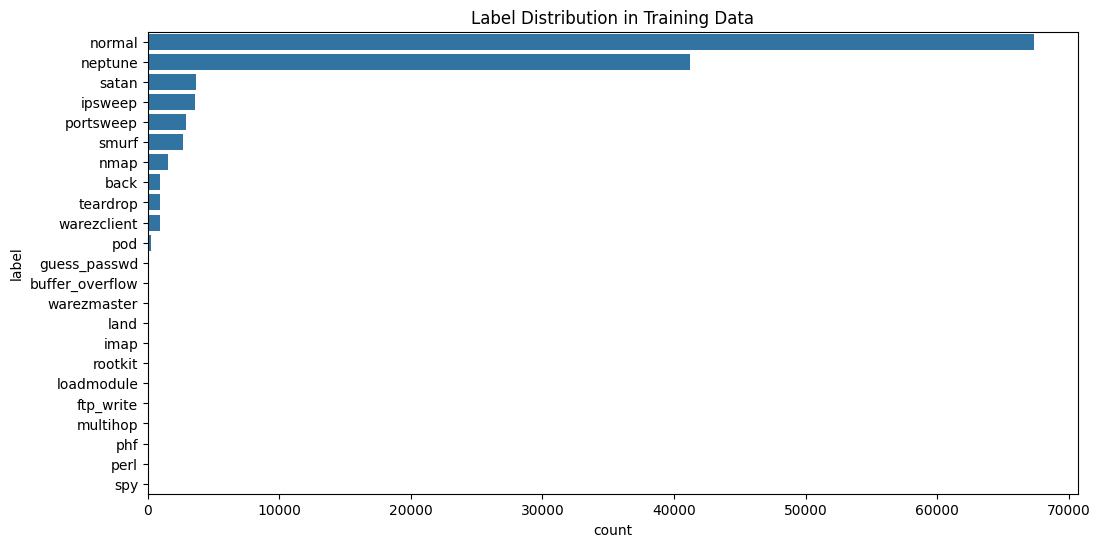

In [16]:
# Bar plot for label distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, y='label', order=train_data['label'].value_counts().index)
plt.title('Label Distribution in Training Data')
plt.show()


##5. Correlation Analysis of Numerical Features
Identify correlations between numerical features to detect multicollinearity or feature redundancies.

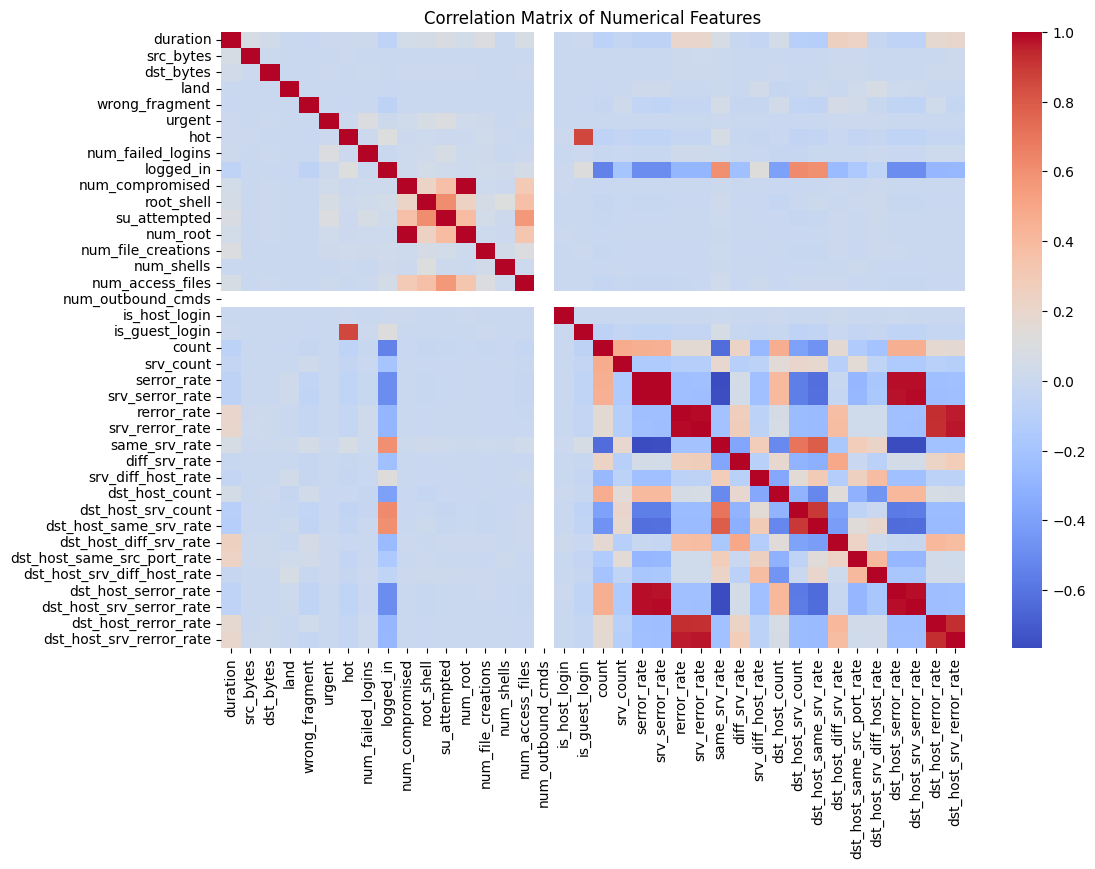

In [17]:
# Correlation matrix
correlation_matrix = train_data[numerical_features].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##6. Statistical Analysis of Features
Examine feature distributions and relationships with the target variable.

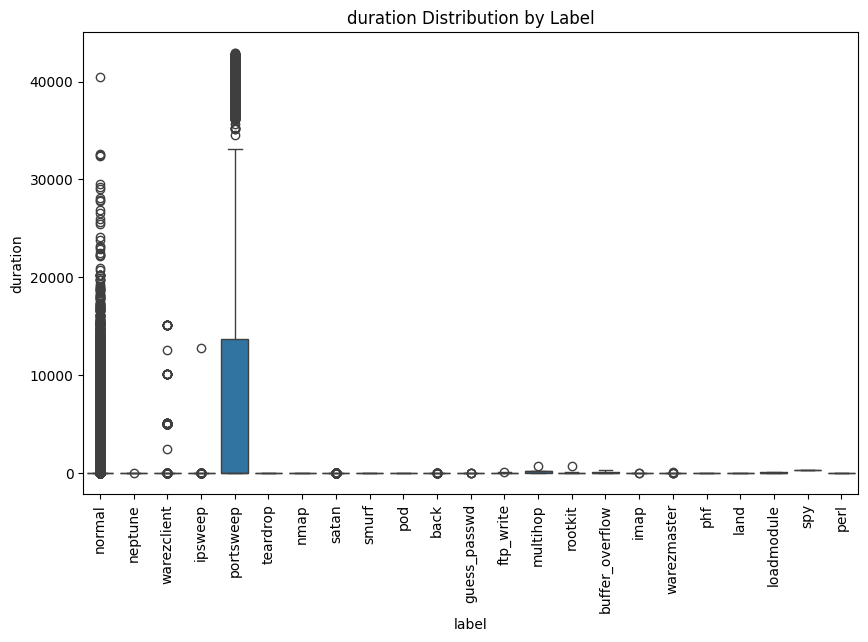

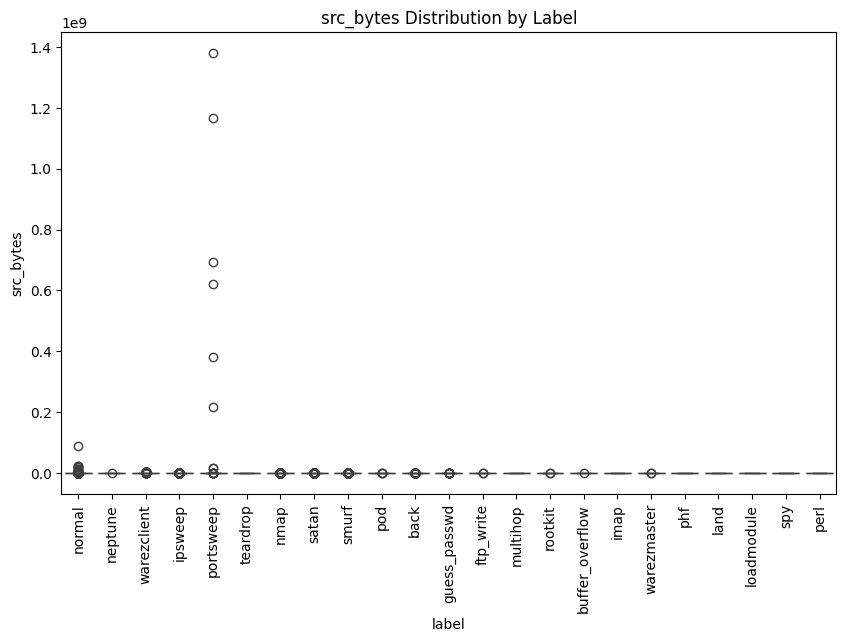

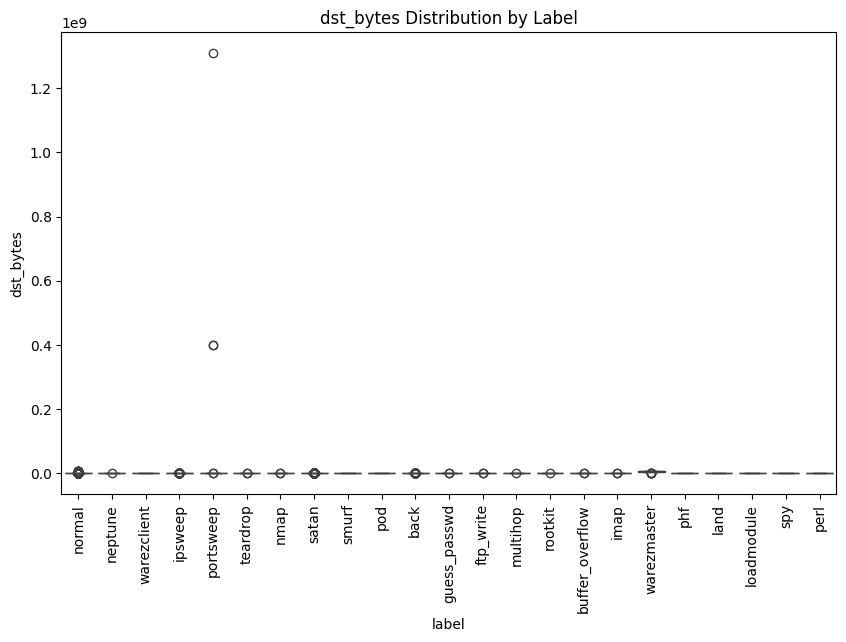

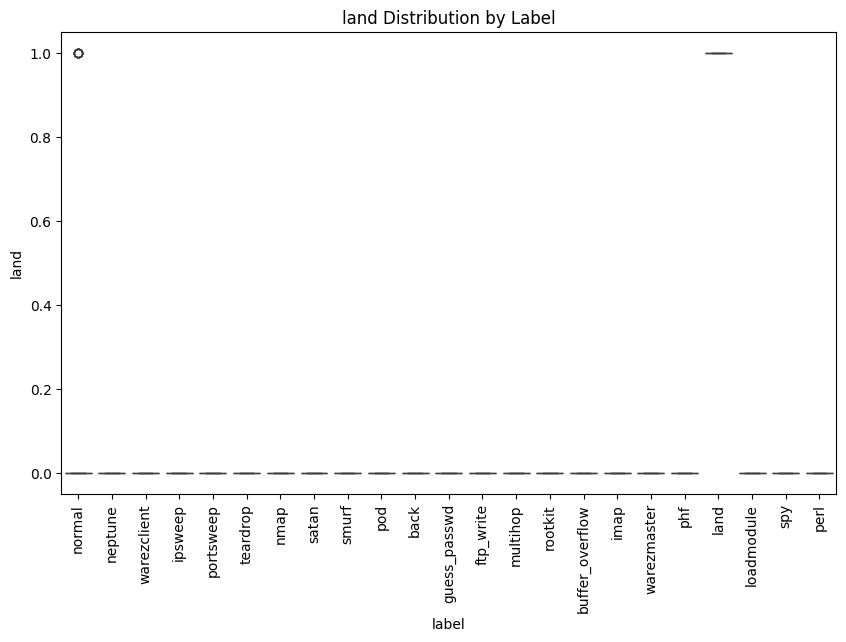

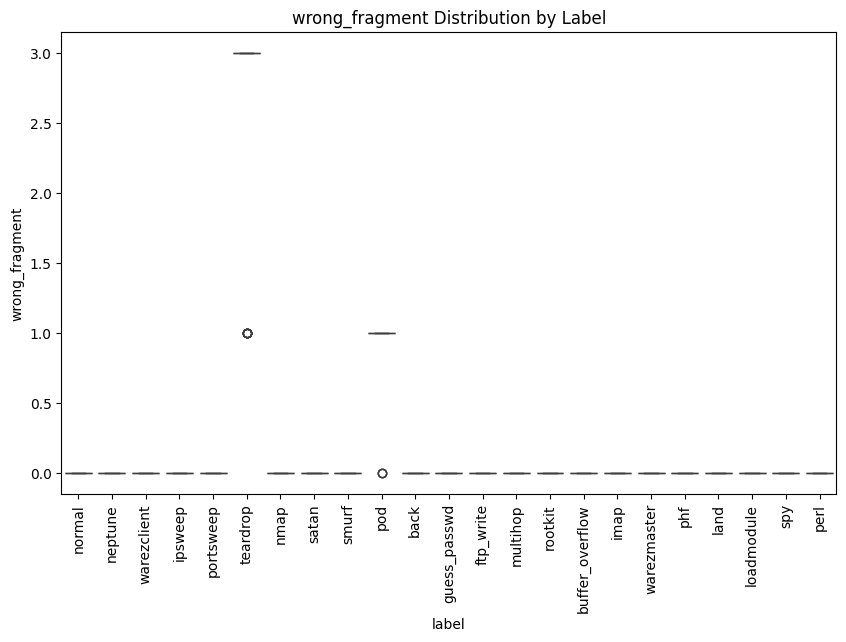

In [18]:
# Box plot of numerical features grouped by 'label'
for feature in numerical_features[:5]:  # Limiting to first 5 for simplicity
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data, x='label', y=feature)
    plt.title(f'{feature} Distribution by Label')
    plt.xticks(rotation=90)
    plt.show()


##7. Analyze Class Imbalance
Determine whether the dataset is balanced across different labels.

In [19]:
# Count and percentage of each label
label_counts = train_data['label'].value_counts()
label_percentages = (label_counts / len(train_data)) * 100

print("Label Counts:")
print(label_counts)
print("\nLabel Percentages:")
print(label_percentages)


Label Counts:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label Percentages:
label
normal             53.458281
neptune            32.716534
satan               2.883951
ipsweep             2.856961
portsweep           2.326689
smurf               2.100450
nmap                1.185175
back                0.758893
teardrop            0.708088
warezclient         0.706501
pod                 0.159558
guess_passwd        0.042073
buffe

##8. Visualizing Pairwise Relationships
Visualize pairwise relationships between key numerical features and the target variable using pair plots.

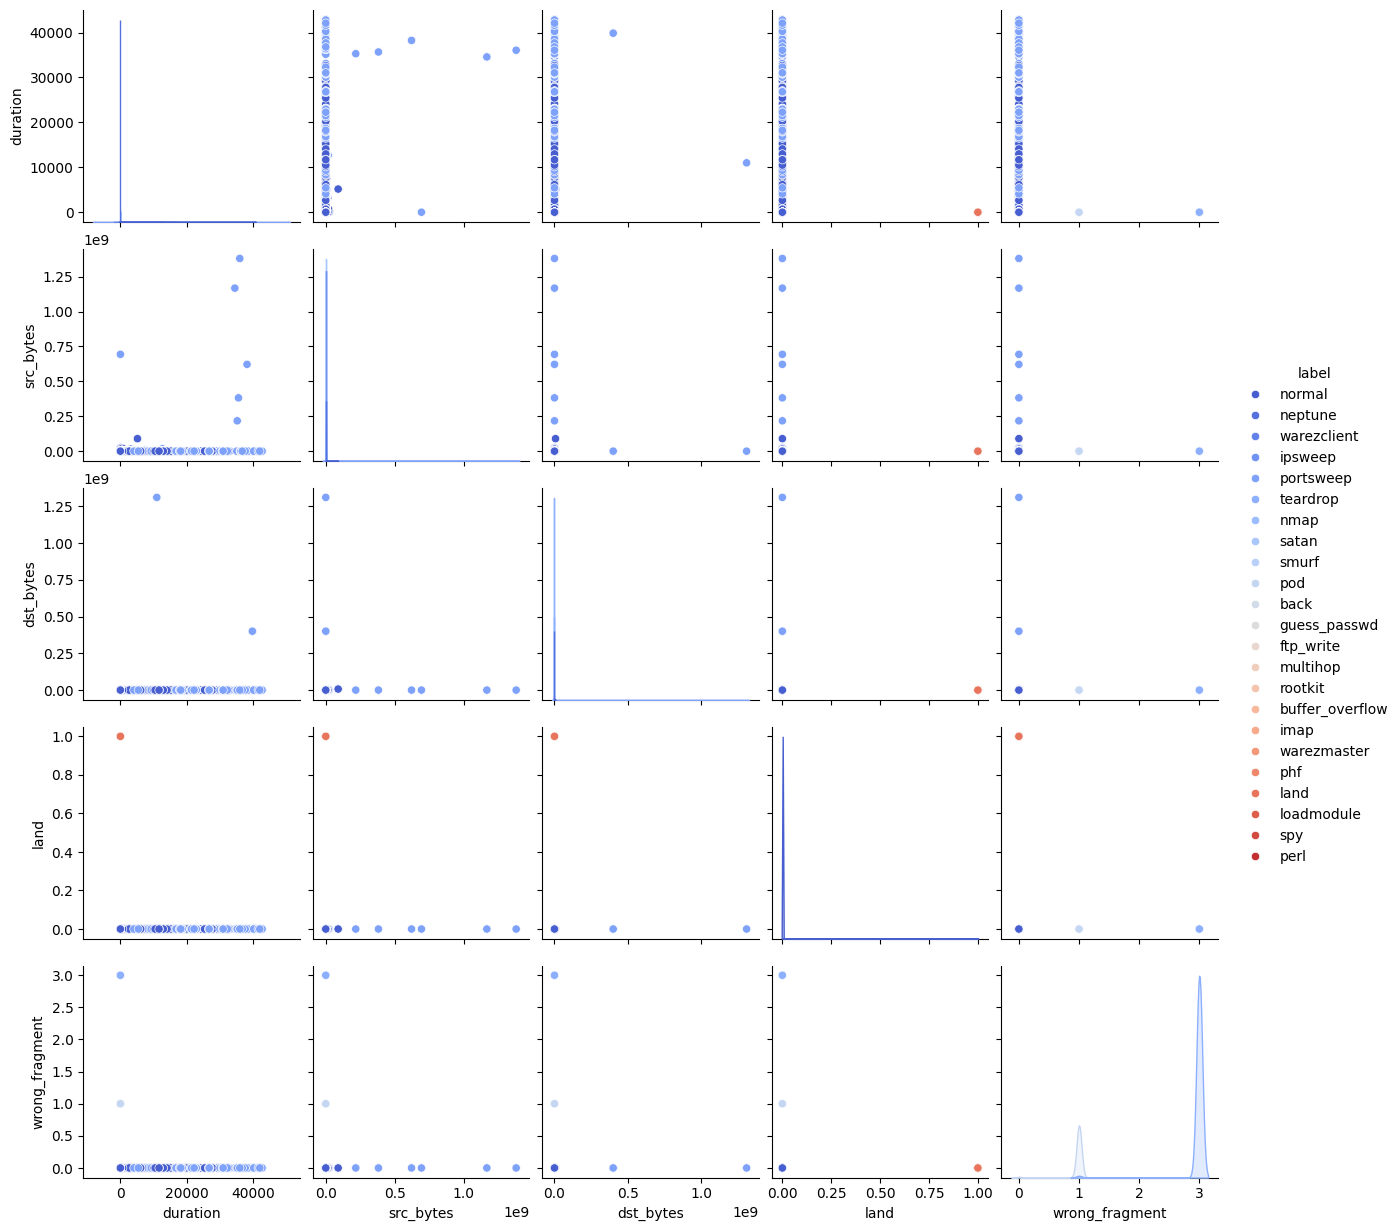

In [20]:
# Select a subset of numerical features for visualization
selected_features = numerical_features[:5]  # Select first 5 numerical features
sns.pairplot(train_data, vars=selected_features, hue='label', palette='coolwarm')
plt.show()
